<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<H1 align='center'> Challenge Kaggle </H1>
<H5 align='center'> Predicción del precio de una casa: EDA </H5>



<H3> INF-395 Redes Neuronales y Deep Learning </H3>
<H3> Autor: Francisco Andrades</H3>

Lenguaje: Python

Temas:

    - Arquitectura de Redes Neuronales *Feed-Forward*
    - Entrenamiento de Redes Neuronales. 
    - Parte Básica de Redes Convolucionales. 
    - Problemas Especiales.

Link Competencia: https://www.kaggle.com/c/prediccin-del-precio-de-una-casa

Equipo: Bios
<hr style="height:2px;border:none"/>

### Contexto

Queremos predecir el precio de una casa a partir de metadata como el número de habitaciones, el número de baños, el área total de la casa y el zipcode.

### Dataset

El dataset de entrenamiento incluye la información de 443 propiedades con sus respectivos precios. El dataset de pruebas incluye la información de 92 propiedades, pero no estarán disponibles los precios. 

**La métrica de evaluación para esta competencia es MSE** 

In [4]:
# librerias y cargar los datos
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
path = '../input/data-t1-nns/'

data_train = pd.read_csv(path+'metadata_casas_train.csv',index_col=0)
data_test = pd.read_csv(path+'metadata_casas_test.csv',index_col=0)


display(data_train.head(5))
print("Shape train: ",data_train.shape)
display(data_test.head(5))
print("Shape test: ",data_test.shape)



,cod_casa,habitaciones,banos,area,zipcode,precio
0,OC4U9J6C11R5715,4,4.0,4053,85255,869500
1,CQF44W2LE3S3NSC,4,3.0,3343,36372,865200
2,LT2Z9MOPF5KIM7T,3,4.0,3923,85266,889000
3,VUCNPXL2QMIA22A,5,5.0,4022,85262,910000
4,9CWP6T0SBBLGDBL,3,4.0,4116,85266,971226


Shape train:  (443, 6)


,cod_casa,habitaciones,banos,area,zipcode
5,0R9Z8TJ4HVOWUAJ,4,5.0,4581,85266
18,3NYK5GU80YVQR1A,5,4.0,4190,85255
21,92S3N8VWFYQRI0Q,6,6.5,5963,85262
28,YZUR2KSKR0B46WU,4,4.0,4464,85377
35,HXFZX9UOWGJ7PTE,3,4.5,3893,85255


Shape test:  (92, 5)


In [13]:
data_train.dtypes

cod_casa         object
habitaciones      int64
banos           float64
area              int64
zipcode           int64
precio            int64
dtype: object

La cantidad de baños puede ser #.5, la parte decimal representa un baño sin ducha.

### Revisando Precio

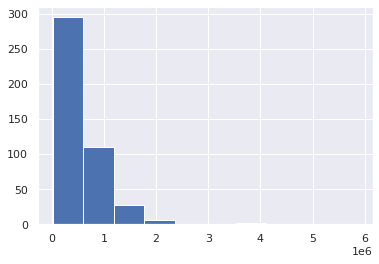

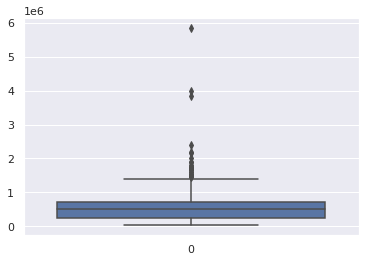

In [9]:
data_train.precio.hist()
plt.show()
sns.boxplot(data = data_train.precio)
plt.show()

Se observan severos outliers en el target.

Podrían trabajarse usando una transformación logarítmica, reemplazo por la media/mediana, reemplazo por valor máximo, eliminar los más severos, etc.

### Revisando relación entre variables

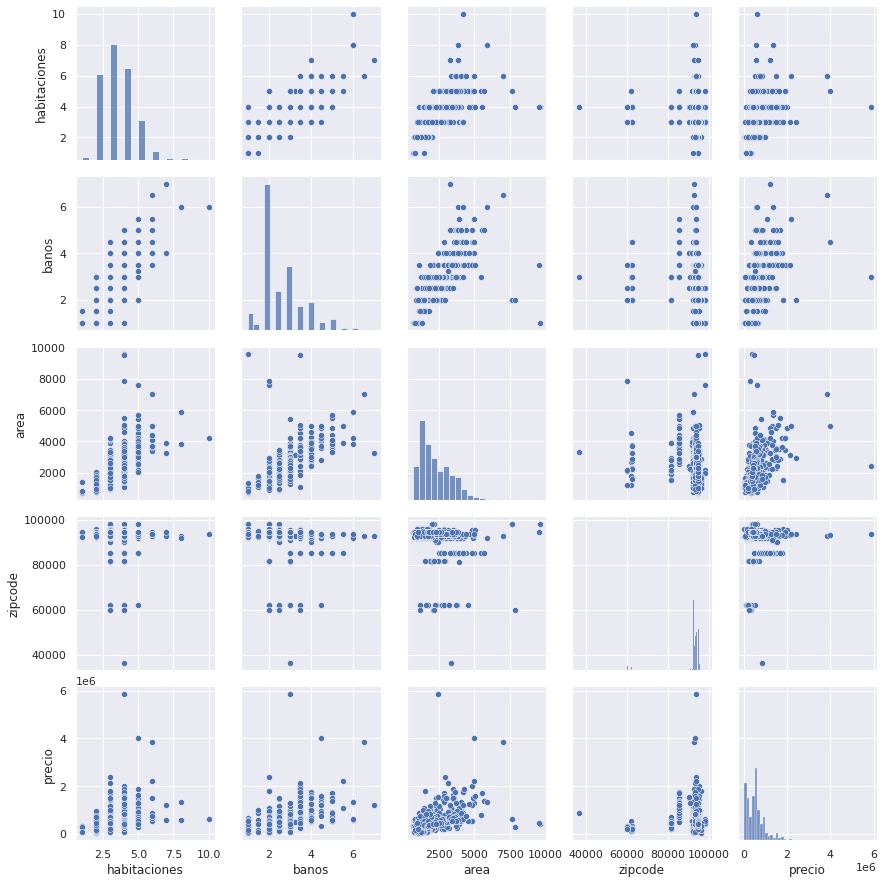

In [10]:
sns.pairplot(data_train)

Se observan claras relaciones entre las variables (habitaciones,banos,area,precio).

La variable zipcode **parece** no tener relaciones claras. Esto es esperable, debido a que está representada como una variable numérica.

Una investigación detallada del zipcode revela que representa una codificación categórica jerárquica. Se debe hacer la transformación indicada de la variable para que sea de utilidad.

En resumen, **no puede trabajarse como una variable numérica**.

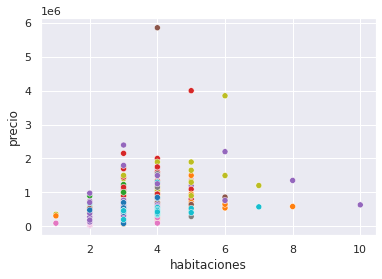

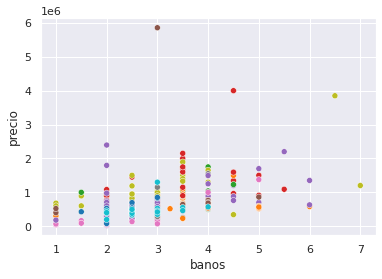

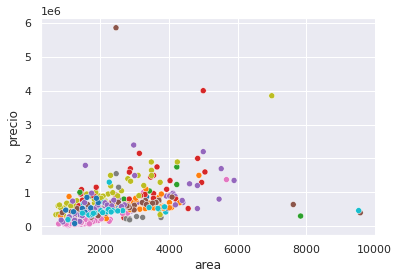

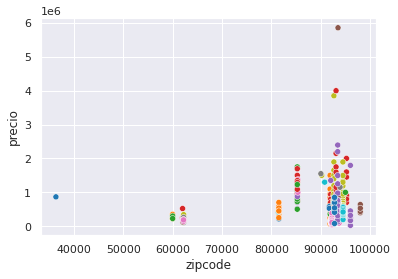

In [11]:
columnas = ['habitaciones','banos','area','zipcode']
for x in columnas:
    sns.scatterplot(x=x,y='precio',data=data_train,hue='zipcode',palette='tab10',legend=False)
    plt.show()

Se mantiene al análisis anterior sobre las relaciones con la variable precio.

In [18]:
codes = data_train.zipcode
new = data_test.zipcode
print("Zipcodes que están en test, pero no en train: ",new[~new.isin(codes)].values)

Zipcodes que están en test, pero no en train:  [60046 90265 93314]


Existen Zipcodes en test que no están en train.

### Sobre la codificación de zipcodes

Zipcode es una forma de representar categorías de forma jerárquica.
<img src="https://www.loqate.com/media/3573/zip-code-1.png?width=500&height=216.90258118234803" title="Title text" width="80%" />

Puede verse en la imagen que el primer dígito actúa como una categoría a gran escala, el segundo y tercer dígito representan una categoría dentro de ésta, y los últimos dos dígitos representan una categoría aún más fina.

Hacer un One Hot Encoding tomando como categorías los zipcodes completos no es suficiente. 

Tiene dos problemas:

    - No considera la categorización jerárquica: dos zipcodes que comparten el primer dígito, por ejemplo, se verían representados como categorías totalmente diferentes (cuando realmente comparten información parcial)
    - No es posible capturar ningún tipo de información sobre zipcodes que los datos de entrenamiento no han visto nunca. (que están en test, pero no en train)

Se propone la siguiente forma de representarlos:

    - One Hot Encoding sólo sobre el primer dígito
    - One hot Encoding sobre todas las combinaciones (primer_dígito (segundo_dígito,tercer_dígito)).
    - One Hot Encoding sobre todas las combinaciones (primer_dígito,(segundo_dígito,tercer_dígito),(cuarto_dígito,quinto_dígito)).
    
    
Unión de todas las columnas anteriores.

De esta forma se considera la información jerárquica y es posible capturar información parcial cuando sólo una parte de los zipcodes coinciden.

**Update después de resultados de la competencia**

Esta forma de representar los zipcodes fue correcta y beneficiosa. Permitió al enfoque distinguirse y ganar la competencia.